In [66]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [67]:
import warnings
warnings.filterwarnings("ignore")

# Carregando o arquivo de dados para análise

O arquivo "diabetes_data_upload.csv" contém informações sobre pacientes com diabetes, coletadas diretamente de questionários, conforme descrito no artigo.

A base de dados possui 520 instâncias, e será utilizada para aplicar os algoritmos de aprendizado de máquina, como Naive Bayes, Regressão Logística e Random Forest, mencionados no artigo.

In [118]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('diabetes_data_upload.csv')

Saving diabetes_data_upload.csv to diabetes_data_upload (4).csv


## Data Exploration

# Exibindo as primeiras linhas do DataFrame

O comando df.head() permite visualizar as primeiras 5 linhas do conjunto de dados carregado, o que ajuda a entender a estrutura dos dados.

Isso é útil para verificar se os dados foram carregados corretamente e identificar as variáveis presentes, como "Age", "Gender", "class" (rótulo de diabetes).

In [69]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


# Obtendo informações sobre o DataFrame

O comando df.info() fornece um resumo sobre o conjunto de dados, incluindo o número de entradas, o tipo de dados de cada coluna, e se há valores ausentes (nulls).

Essa informação é útil para verificar a consistência dos dados, o tipo de dados de cada variável (por exemplo, numérica ou categórica) e para identificar possíveis problemas, como dados ausentes.

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

# Convertendo a coluna 'Gender' para o tipo de dado string (str)

O método apply(str) é usado para garantir que todos os valores na coluna 'Gender' sejam tratados como strings.

Isso é útil quando se quer garantir que todas as categorias (como 'Male' e 'Female') sejam consistentes, evitando problemas de tipo de dados durante a análise ou modelagem.

In [71]:
df['Gender'] = df['Gender'].apply(str)

# Contando a distribuição dos valores nas colunas 'class' e 'Gender'

O método value_counts() retorna o número de ocorrências de cada valor único em uma coluna.

Isso é útil para entender a distribuição dos dados nas variáveis de interesse, como a classe (diabetes ou não) e o gênero (masculino ou feminino).

In [72]:
df['class'].value_counts(), df['Gender'].value_counts()

(class
 Positive    320
 Negative    200
 Name: count, dtype: int64,
 Gender
 Male      328
 Female    192
 Name: count, dtype: int64)

# Plotando o histograma da coluna 'Age'

O histograma permite visualizar a distribuição da idade dos pacientes.

Cada barra no histograma representa a frequência de pacientes em um determinado intervalo de idade.

O histograma ajuda a identificar a faixa etária predominante no dataset,
possibilitando uma análise inicial da distribuição da idade.

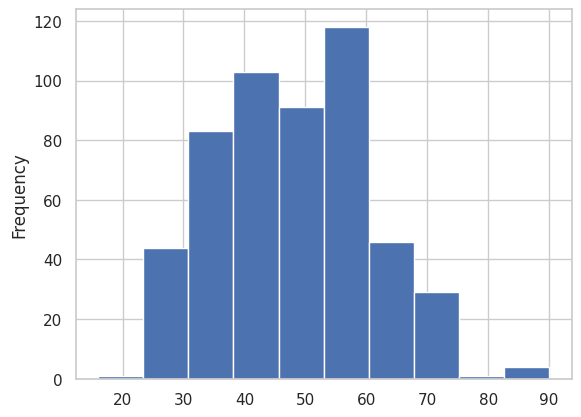

In [119]:
df['Age'].plot.hist()
plt.show()

# Exibindo os nomes das colunas do DataFrame

Este comando retorna a lista de todas as colunas presentes no conjunto de dados 'df'.

A saída nos permite entender a estrutura do dataset e quais variáveis estão disponíveis para análise.

Cada coluna representa uma característica dos pacientes, como 'Age', 'Gender', 'class', entre outras.

In [74]:
 df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

Convertendo variáveis categóricas para valores binários (0 e 1) para facilitar o processamento no modelo de aprendizado de máquina.

A operação 'map' é aplicada a cada coluna que possui valores categóricos 'Yes'/'No' ou 'Male'/'Female'.

O objetivo é transformar essas variáveis em valores numéricos, onde:

- Para a variável 'Gender', 'Male' é mapeado para 1 e 'Female' para 0.
- Para variáveis como 'Polyuria', 'Polydipsia', 'sudden weight loss', entre outras,'Yes' é mapeado para 1 e 'No' para 0.
- A coluna 'class', que representa se o paciente tem diabetes ou não, é mapeada como 'Positive' para 1 e 'Negative' para 0.

Isso é necessário porque muitos algoritmos de aprendizado de máquina exigem entradas numéricas, e essa transformação facilita o uso do modelo.

In [75]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Polyuria'] = df['Polyuria'].map({'Yes': 1, 'No': 0})
df['Polydipsia'] = df['Polydipsia'].map({'Yes': 1, 'No': 0})
df['sudden weight loss'] = df['sudden weight loss'].map({'Yes': 1, 'No': 0})
df['weakness'] = df['weakness'].map({'Yes': 1, 'No': 0})
df['Polyphagia'] = df['Polyphagia'].map({'Yes': 1, 'No': 0})
df['Genital thrush'] = df['Genital thrush'].map({'Yes': 1, 'No': 0})
df['visual blurring'] = df['visual blurring'].map({'Yes': 1, 'No': 0})
df['Itching'] = df['Itching'].map({'Yes': 1, 'No': 0})
df['Irritability'] = df['Irritability'].map({'Yes': 1, 'No': 0})
df['delayed healing'] = df['delayed healing'].map({'Yes': 1, 'No': 0})
df['partial paresis'] = df['partial paresis'].map({'Yes': 1, 'No': 0})
df['muscle stiffness'] = df['muscle stiffness'].map({'Yes': 1, 'No': 0})
df['Alopecia'] = df['Alopecia'].map({'Yes': 1, 'No': 0})
df['Obesity'] = df['Obesity'].map({'Yes': 1, 'No': 0})
df['class'] = df['class'].map({'Positive': 1, 'Negative': 0})

## Model Building

O código abaixo separa as variáveis independentes (X) e dependente (y)
para a construção de um modelo de aprendizado de máquina. Isso é feito
da seguinte forma:

- 'X': Representa as variáveis independentes, ou seja, todas as colunas
  do dataframe, exceto a coluna 'class'. Essa coluna 'class' é a variável
  que o modelo irá tentar prever, então ela é removida de 'X'.
- 'y': Representa a variável dependente, que neste caso é a coluna 'class',
  indicando se o paciente foi diagnosticado com diabetes ('1' para positivo,
  '0' para negativo). O modelo irá aprender a prever essa variável com base
  nas variáveis independentes presentes em 'X'.

A variável 'X' é utilizada para treinar o modelo, fornecendo as informações
sobre o paciente (como idade, gênero, sintomas, etc.), enquanto 'y' é a variável
alvo que o modelo tentará prever.

A seguir, a divisão dos dados em treinamento e teste será realizada para avaliar o desempenho do modelo de maneira justa, treinando o modelo em uma parte dos dados e avaliando-o em outra parte separada.

In [76]:
from sklearn.model_selection import train_test_split

X = df.drop(['class'], axis='columns')
y = df['class']

O código abaixo realiza a divisão dos dados em dois conjuntos: um para treinamento e outro para teste. A função train_test_split da biblioteca sklearn.model_selection é utilizada para fazer essa separação.

O parâmetro test_size=0.25 define que 25% dos dados serão reservados para o conjunto de teste, enquanto os 75% restantes serão usados para treinar o modelo. Esse valor de 0.25 é bastante comum, mas pode ser ajustado dependendo da quantidade de dados e da necessidade de balanceamento entre os conjuntos de treino e teste.

O parâmetro random_state=50 garante que a divisão dos dados seja reprodutível. Isso significa que, sempre que o código for executado com o mesmo valor de random_state, a divisão dos dados será a mesma, o que é importante para garantir consistência nos experimentos e resultados.

A separação entre os conjuntos de treinamento e teste é uma prática fundamental para evitar o overfitting, que ocorre quando o modelo aprende detalhes específicos dos dados de treinamento e tem dificuldade em generalizar para novos dados. Com a divisão, o modelo é treinado com 75% dos dados e avaliado com os 25% restantes, garantindo que a avaliação do modelo seja realizada em dados que ele não viu durante o treinamento.

Após essa divisão, o conjunto de dados de treinamento (X_train, y_train) é utilizado para treinar o modelo, e o conjunto de teste (X_test, y_test) é utilizado para avaliar o desempenho do modelo, geralmente medido por métricas como acurácia, precisão e recall. Esse processo é essencial para garantir que o modelo seja capaz de generalizar bem e tenha um bom desempenho em novos dados.

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

Este trecho de código utiliza o GridSearchCV para realizar uma busca exaustiva pelos melhores parâmetros dos algoritmos de aprendizado de máquina aplicados ao problema. Abaixo estão os componentes principais desse processo:

    Importação de Bibliotecas:
        GridSearchCV: Do módulo sklearn.model_selection, é uma ferramenta que realiza a busca por combinações de parâmetros para o modelo de aprendizado de máquina e encontra o melhor conjunto de parâmetros com base em uma métrica de avaliação (como a acurácia).
        ShuffleSplit: Também do módulo sklearn.model_selection, é utilizado para dividir os dados de forma aleatória em múltiplos subconjuntos de treino e teste. Ele garante que a divisão dos dados seja feita repetidamente de maneira aleatória, para que o modelo seja avaliado de forma robusta em diferentes subconjuntos.

    Importação dos Modelos:
        LogisticRegression: Um modelo de regressão logística que é amplamente utilizado para problemas de classificação binária ou multiclasse. Ele tenta aprender uma relação linear entre as variáveis independentes e a variável dependente.
        RandomForestClassifier: Um modelo de aprendizado baseado em árvores de decisão que constrói múltiplas árvores de decisão durante o treinamento e as utiliza para melhorar a previsão do modelo (agregação dos resultados). É um modelo de ensemble learning que tende a ser mais robusto do que uma única árvore de decisão.
        BernoulliNB: Um modelo de Naive Bayes que é usado para classificações em que os atributos possuem duas classes (binários), como "sim" ou "não", "verdadeiro" ou "falso". Ele baseia-se na aplicação do teorema de Bayes e assume que as características são independentes entre si.

    Objetivo: O objetivo de utilizar o GridSearchCV com esses modelos é encontrar o conjunto de parâmetros que gera o melhor desempenho para o problema de classificação em questão. O processo de busca é feito para cada modelo, com o GridSearchCV avaliando as diferentes combinações de parâmetros especificadas e selecionando o modelo e parâmetros que geram os melhores resultados com base em uma métrica de avaliação (geralmente acurácia).

In [78]:
#Using GridSearchCV to find the best algorithm for this problem

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import BernoulliNB

Este trecho de código define uma função chamada find_best_model que tem como objetivo encontrar o melhor modelo para um problema de classificação, utilizando três modelos diferentes e realizando uma busca de parâmetros usando GridSearchCV. A função retorna uma tabela com o nome do modelo, os melhores parâmetros encontrados e a pontuação de desempenho associada. Aqui está a explicação detalhada de cada parte:

    Definição dos Modelos e Parâmetros:
        A função começa definindo um dicionário chamado models que contém três modelos de aprendizado de máquina diferentes:
            Logistic Regression: O modelo de regressão logística é configurado com o solucionador lbfgs e o tipo de problema multiclasse configurado como auto. Para este modelo, o parâmetro de regularização C será ajustado com os valores [1, 5, 10].
            Random Forest: O modelo de floresta aleatória usa o critério de gini para dividir os nós das árvores. O parâmetro n_estimators, que define o número de árvores na floresta, será ajustado com os valores [10, 15, 20, 50, 100, 200].
            Bernoulli Naive Bayes (BernoulliNB): O modelo Naive Bayes é utilizado com o parâmetro alpha ajustado para os valores [0, 1.0], que controla o suavização dos dados.

    Avaliação do Desempenho:
        O código cria uma lista vazia chamada scores para armazenar os resultados da busca.
        cv_shuffle: A validação cruzada é configurada utilizando ShuffleSplit, que divide os dados em 5 subconjuntos, usando 80% para treinamento e 20% para teste. Essa divisão é feita aleatoriamente, garantindo diferentes variações nos dados para cada execução da validação cruzada.

    Busca de Parâmetros com GridSearchCV:
        A função entra em um loop sobre os modelos definidos no dicionário models. Para cada modelo, o GridSearchCV é utilizado para realizar a busca de parâmetros, levando em consideração os parâmetros definidos para cada modelo.
        A função gs.fit(X, y) ajusta o modelo aos dados de entrada X e y, utilizando os parâmetros fornecidos.
        O GridSearchCV calcula o melhor conjunto de parâmetros e a melhor pontuação de desempenho (por exemplo, a acurácia) para cada modelo.
        Os resultados são adicionados à lista scores, incluindo o nome do modelo, os melhores parâmetros encontrados e a pontuação de desempenho.

    Retorno:
        A função retorna um DataFrame do Pandas, onde cada linha contém o nome do modelo, os melhores parâmetros e a pontuação de desempenho associada.

    Chamando a Função:
        A linha find_best_model(X_train, y_train) (comentada) chama a função passando os dados de treinamento para calcular os melhores modelos, mas ela está comentada para não ser executada diretamente aqui.

In [79]:
# Creating a function to calculate best model for this problem

def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },

        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },

        'bernoullinb': {
            'model' : BernoulliNB(),
            'parameters': {
                'alpha' : [0,1.0]
            }
        }
    }

    scores = []
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)

    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })

    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

#find_best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 1},0.953846
1,random_forest,{'n_estimators': 50},0.989744
2,bernoullinb,{'alpha': 1.0},0.910256


In [80]:
find_best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 1},0.953846
1,random_forest,{'n_estimators': 50},0.992308
2,bernoullinb,{'alpha': 1.0},0.910256


Acurácia com Cross-Validation para cada modelo:

    As primeiras três linhas de código realizam a validação cruzada (cross-validation) para três modelos diferentes: Logistic Regression, Random Forest e Bernoulli Naive Bayes.
    Para cada modelo, é utilizado o método cross_val_score do scikit-learn, que divide os dados de treinamento em 5 subconjuntos (ou "folds") e avalia a performance de cada modelo com base nos dados de treino e teste (utilizando o parâmetro cv=5 para definir 5 "folds").
        LogisticRegression(C=1): Aqui, é criado um modelo de regressão logística, com o parâmetro de regularização C definido como 1.
        RandomForestClassifier(n_estimators=50): Um modelo de floresta aleatória é configurado com 50 árvores (usando o parâmetro n_estimators=50).
        BernoulliNB(alpha=1.0): O modelo Naive Bayes Bernoulli é configurado com o parâmetro alpha igual a 1.0, que controla a suavização dos dados.
    Cada chamada ao cross_val_score retorna uma lista de 5 valores (um para cada "fold"), representando a acurácia do modelo para cada uma das divisões dos dados.

Plotando gráfico comparativo de desempenho:

    A seguir, o código cria um gráfico para comparar o desempenho dos três modelos em termos de acurácia.
    plt.figure(figsize=(10, 6)): Essa linha configura o tamanho da figura do gráfico, definindo uma largura de 10 e uma altura de 6 polegadas.
    plt.plot(range(1, 6), scores_lr, label="Logistic Regression", marker='o'): Aqui, é plotada a acurácia da regressão logística para os 5 "folds" no eixo horizontal (representado por range(1, 6)). O marcador 'o' indica que os pontos da curva serão representados por círculos.
    plt.plot(range(1, 6), scores_rf, label="Random Forest", marker='x'): De forma similar, a acurácia do modelo de floresta aleatória é plotada, utilizando o marcador 'x'.
    plt.plot(range(1, 6), scores_nb, label="Bernoulli Naive Bayes", marker='s'): O modelo de Naive Bayes Bernoulli é plotado com o marcador 's' (quadrado).
    plt.xlabel("Fold"): Define o rótulo do eixo X como "Fold", indicando que cada ponto no gráfico corresponde a um "fold" da validação cruzada.
    plt.ylabel("Accuracy"): Define o rótulo do eixo Y como "Accuracy", para representar a acurácia de cada modelo nos respectivos "folds".
    plt.title("Performance Comparison (Cross-Validation)"): Define o título do gráfico como "Performance Comparison (Cross-Validation)", refletindo o objetivo de comparar o desempenho dos três modelos.
    plt.legend(): Adiciona uma legenda ao gráfico para identificar as curvas correspondentes a cada modelo.
    plt.show(): Exibe o gráfico gerado.

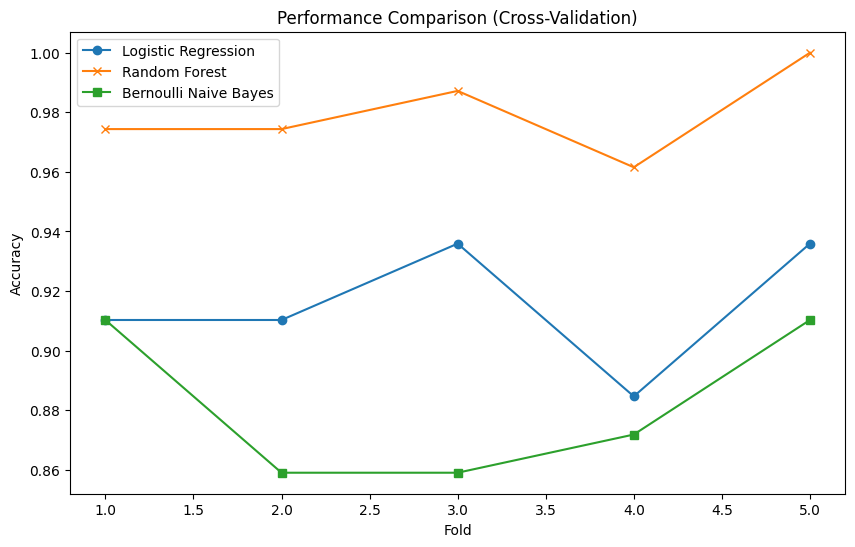

In [89]:
#teste do chat gpt

# Acurácia com Cross-Validation para cada modelo
scores_lr = cross_val_score(LogisticRegression(C=1), X_train, y_train, cv=5)
scores_rf = cross_val_score(RandomForestClassifier(n_estimators=50), X_train, y_train, cv=5)
scores_nb = cross_val_score(BernoulliNB(alpha=1.0), X_train, y_train, cv=5)

# Plotando gráfico comparativo de desempenho
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), scores_lr, label="Logistic Regression", marker='o')
plt.plot(range(1, 6), scores_rf, label="Random Forest", marker='x')
plt.plot(range(1, 6), scores_nb, label="Bernoulli Naive Bayes", marker='s')
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Performance Comparison (Cross-Validation)")
plt.legend()
plt.show()


Importando o cross_val_score:

    from sklearn.model_selection import cross_val_score: O código importa a função cross_val_score do módulo sklearn.model_selection, que é usada para realizar validação cruzada e calcular a acurácia de um modelo, dividindo os dados de treinamento em várias partes (ou "folds").

Calculando a acurácia média:

    scores = cross_val_score(RandomForestClassifier(n_estimators=20, random_state=0), X_train, y_train, cv=5): Aqui, a função cross_val_score é chamada para realizar a validação cruzada com o modelo RandomForestClassifier.
        RandomForestClassifier(n_estimators=20, random_state=0): O modelo RandomForestClassifier é configurado com 20 árvores (n_estimators=20). O parâmetro random_state=0 garante que os resultados sejam reprodutíveis, ou seja, que a divisão dos dados para os "folds" seja sempre a mesma.
        X_train e y_train: São os dados de entrada e as classes alvo, respectivamente, usados para treinar o modelo.
        cv=5: A validação cruzada é configurada com 5 "folds" (divisões), o que significa que o conjunto de dados será dividido em 5 partes, e o modelo será treinado 5 vezes, cada vez utilizando 4 partes para treinamento e 1 para teste.

Calculando e exibindo a acurácia média:

    print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3)): Após a execução da validação cruzada, a função cross_val_score retorna uma lista de acurácias, uma para cada "fold". O código realiza os seguintes passos:
        sum(scores): Soma as acurácias obtidas para cada "fold".
        len(scores): Obtém o número de "folds" (neste caso, 5).
        sum(scores)*100/len(scores): Calcula a acurácia média multiplicando pela constante 100 para converter o valor para porcentagem.
        round(..., 3): Arredonda o valor para 3 casas decimais.
        '{}%'.format(...): Formata o resultado para exibir como uma porcentagem.
        print(...): Exibe o valor da acurácia média.
        

In [88]:
# Using cross_val_score for gaining average accuracy

from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=20, random_state=0), X_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 97%


Criando o modelo Random Forest:

    rf = RandomForestClassifier(n_estimators=100, random_state=69): Aqui, estamos criando uma instância do classificador RandomForestClassifier do scikit-learn.
        n_estimators=100: Este parâmetro define o número de árvores na floresta. Neste caso, estamos configurando o modelo para ter 100 árvores. Mais árvores geralmente aumentam a precisão do modelo, mas também podem aumentar o tempo de treinamento e a complexidade computacional.
        random_state=69: Este parâmetro garante que os resultados sejam reprodutíveis, ou seja, se o código for executado novamente com os mesmos dados e parâmetros, os resultados serão sempre os mesmos. O valor 69 é um número arbitrário, e qualquer valor poderia ser usado, desde que seja consistente para garantir a reprodutibilidade.

Treinando o modelo:

    rf.fit(X_train, y_train): O método fit() é usado para treinar o modelo com os dados de treinamento:
        X_train: Contém as variáveis de entrada ou características (features) usadas para prever a classe.
        y_train: Contém as classes ou rótulos (target) associadas às entradas. O modelo tentará aprender a mapear as entradas X_train para as saídas y_train.

Esse processo de treinamento é onde o modelo Random Forest aprende padrões e relações dos dados para poder fazer previsões em dados novos.

In [82]:
# Creating Random Forest Model

rf = RandomForestClassifier(n_estimators=100, random_state=69)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=69)

## Model Evaluation

Importação das bibliotecas necessárias:

    from sklearn.metrics import confusion_matrix, classification_report, accuracy_score: Aqui, estamos importando três funções importantes para avaliar a performance do modelo:
        confusion_matrix: Gera a matriz de confusão, que mostra a comparação entre as previsões do modelo e as verdadeiras classes.
        classification_report: Gera um relatório com métricas de avaliação como precisão, recall e F1-score para cada classe.
        accuracy_score: Calcula a acurácia do modelo, ou seja, a proporção de previsões corretas em relação ao total de previsões feitas.

Gerando previsões com o modelo treinado:

    y_pred = rf.predict(X_test): O modelo Random Forest treinado, rf, é usado para fazer previsões no conjunto de dados de teste X_test.
        X_test contém as características das amostras de teste, e o modelo irá prever os rótulos y_pred, ou seja, a classe que ele acha que corresponde a cada amostra de teste.

Calculando a matriz de confusão:

    cm = confusion_matrix(y_test, y_pred): A função confusion_matrix é usada para comparar as previsões do modelo (y_pred) com os rótulos reais (y_test).
        A matriz de confusão é uma tabela que compara as classes previstas pelo modelo com as classes reais. Ela ajuda a entender como o modelo está performando em cada classe específica, destacando onde ele cometeu erros (falsos positivos e falsos negativos).

Visualizando a matriz de confusão com um gráfico de calor:

    sns.heatmap(cm, cbar=False, annot=True): Estamos utilizando a biblioteca Seaborn para criar um gráfico de calor (heatmap) da matriz de confusão.
        cm: A matriz de confusão gerada.
        cbar=False: Desativa a barra de cores (colorbar), que normalmente indica a intensidade das cores no gráfico.
        annot=True: Adiciona anotações numéricas nas células da matriz, mostrando o valor de cada célula.

Exibindo o gráfico:

    plt.show(): Exibe o gráfico gerado pelo Seaborn. Ele abrirá uma janela contendo a matriz de confusão visualizada como um gráfico de calor.

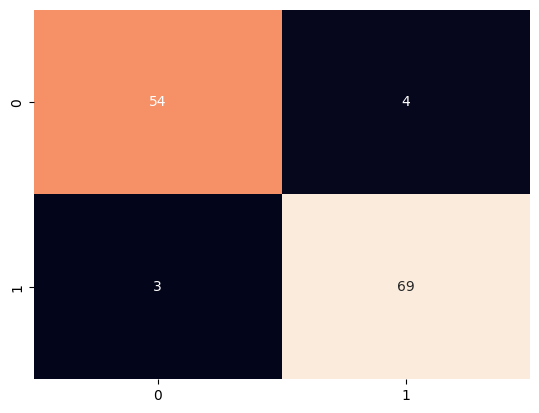

In [83]:
# Creating a confusion matrix

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cbar=False, annot=True)
plt.show()

In [84]:
# Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        58
           1       0.95      0.96      0.95        72

    accuracy                           0.95       130
   macro avg       0.95      0.94      0.95       130
weighted avg       0.95      0.95      0.95       130



In [85]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [86]:
feature_importances

,importance
Polydipsia,0.226520
Polyuria,0.186996
Gender,0.105599
Age,0.090247
partial paresis,0.052769
sudden weight loss,0.049667
Alopecia,0.044813
Irritability,0.040498
Polyphagia,0.037707
Itching,0.030581


In [125]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

# Função para calcular métricas de avaliação para Percentage Split
def evaluate_model(model, X_test, y_test):
    # Predição com dados de teste
    y_pred = model.predict(X_test)

    # Calculando as métricas
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    return {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy
    }

# Dividindo os dados em 80% treino e 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Usando os modelos já treinados
models = {
    'Logistic Regression': lr,  # lr já treinado
    'Random Forest': rf,        # rf já treinado
    'Bernoulli Naive Bayes': nb # nb já treinado
}

# Avaliação com Percentage Split (80:20) - Usando os modelos carregados
results_percentage_split = {}

for model_name, model in models.items():
    # Calculando as métricas para Percentage Split
    results_percentage_split[model_name] = evaluate_model(model, X_test, y_test)

# Avaliação com 10-Fold Cross-Validation - Usando os modelos carregados
results_cv = {}

for model_name, model in models.items():
    # Calculando as métricas com 10-Fold Cross-Validation
    scores = cross_validate(model, X, y, cv=10, scoring=['accuracy', 'precision', 'recall', 'f1'])

    # Calculando a média das métricas
    results_cv[model_name] = {
        'Precision': scores['test_precision'].mean(),
        'Recall': scores['test_recall'].mean(),
        'F1-Score': scores['test_f1'].mean(),
        'Accuracy': scores['test_accuracy'].mean()
    }

# Criando a tabela de comparação
comparison_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Precision (Percentage Split)': [results_percentage_split[model]['Precision'] for model in models.keys()],
    'Recall (Percentage Split)': [results_percentage_split[model]['Recall'] for model in models.keys()],
    'F1-Score (Percentage Split)': [results_percentage_split[model]['F1-Score'] for model in models.keys()],
    'Accuracy (Percentage Split)': [results_percentage_split[model]['Accuracy'] for model in models.keys()],
    'Precision (10-Fold CV)': [results_cv[model]['Precision'] for model in models.keys()],
    'Recall (10-Fold CV)': [results_cv[model]['Recall'] for model in models.keys()],
    'F1-Score (10-Fold CV)': [results_cv[model]['F1-Score'] for model in models.keys()],
    'Accuracy (10-Fold CV)': [results_cv[model]['Accuracy'] for model in models.keys()]
})

# Exibindo a tabela de comparação
print(comparison_df)


                   Model  Precision (Percentage Split)  \
0    Logistic Regression                      0.485714   
1          Random Forest                      0.895833   
2  Bernoulli Naive Bayes                      0.000000   

   Recall (Percentage Split)  F1-Score (Percentage Split)  \
0                   0.377778                     0.425000   
1                   0.955556                     0.924731   
2                   0.000000                     0.000000   

   Accuracy (Percentage Split)  Precision (10-Fold CV)  Recall (10-Fold CV)  \
0                         0.54                0.538724             0.336594   
1                         0.93                0.450386             0.374819   
2                         0.55                0.000000             0.000000   

   F1-Score (10-Fold CV)  Accuracy (10-Fold CV)  
0               0.411309                  0.554  
1               0.404446                  0.510  
2               0.000000                  0.536  


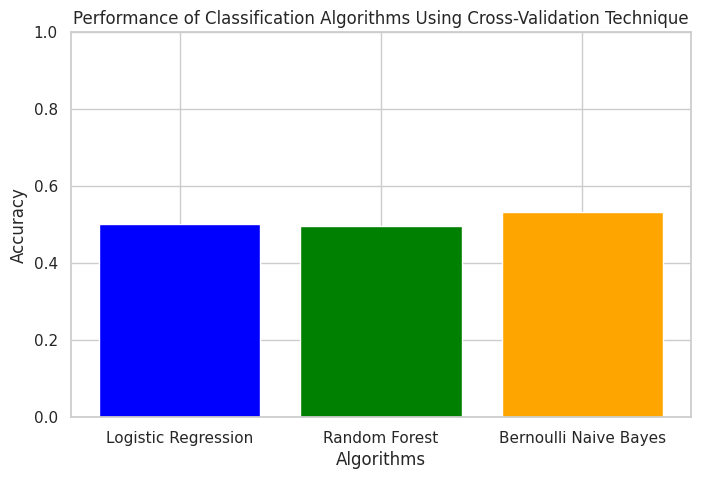

In [126]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

# Usando os modelos já carregados e treinados
models = {
    'Logistic Regression': lr,    # Modelo Logistic Regression já treinado
    'Random Forest': rf,          # Modelo Random Forest já treinado
    'Bernoulli Naive Bayes': nb   # Modelo Bernoulli Naive Bayes já treinado
}

# Calculando a acurácia média para cada modelo com Cross-Validation (usando os modelos carregados)
scores = {}
for model_name, model in models.items():
    scores[model_name] = cross_val_score(model, X_train, y_train, cv=10).mean()  # Média de acurácia

# Configurando os dados para o gráfico
labels = list(scores.keys())
scores_values = list(scores.values())

# Criando o gráfico
plt.figure(figsize=(8, 5))
plt.bar(labels, scores_values, color=['blue', 'green', 'orange'])

# Adicionando título e rótulos
plt.title('Performance of Classification Algorithms Using Cross-Validation Technique')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Acurácia vai de 0 a 1

# Exibindo o gráfico
plt.show()


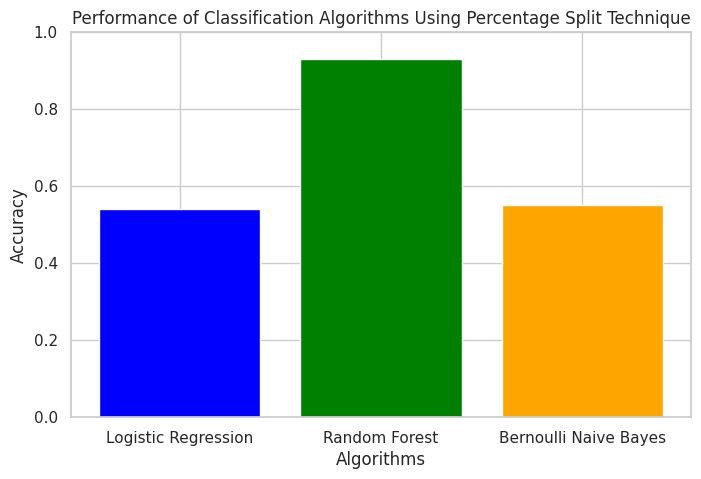

In [127]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Usando os dados de teste já divididos (X_train, X_test, y_train, y_test)
# e os modelos treinados (lr, rf, nb)

# Fazendo previsões com os modelos já treinados
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_nb = nb.predict(X_test)

# Calculando a acurácia de cada modelo
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_nb = accuracy_score(y_test, y_pred_nb)

# Preparando dados para o gráfico
labels = ['Logistic Regression', 'Random Forest', 'Bernoulli Naive Bayes']
scores = [acc_lr, acc_rf, acc_nb]

# Criando o gráfico
plt.figure(figsize=(8, 5))
plt.bar(labels, scores, color=['blue', 'green', 'orange'])

# Adicionando título e rótulos
plt.title('Performance of Classification Algorithms Using Percentage Split Technique')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Acurácia vai de 0 a 1

# Exibindo o gráfico
plt.show()


In [128]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# Dicionário para armazenar os resultados
performance_metrics = {
    'Model': [],
    'TP Rate (Positive)': [],
    'TP Rate (Negative)': [],
    'Weighted Average TP Rate': [],
    'FP Rate (Positive)': [],
    'FP Rate (Negative)': [],
    'Weighted Average FP Rate': [],
    'Precision (Positive)': [],
    'Precision (Negative)': [],
    'Weighted Average Precision': [],
    'Recall (Positive)': [],
    'Recall (Negative)': [],
    'Weighted Average Recall': [],
    'F-measure (Positive)': [],
    'F-measure (Negative)': [],
    'Weighted Average F-measure': []
}

# Calculando os parâmetros de desempenho para cada modelo já treinado
for model_name, model in models.items():
    # Previsão com o modelo já treinado
    y_pred = model.predict(X_test)

    # Calculando a matriz de confusão e métricas
    cm = confusion_matrix(y_test, y_pred)
    tp = cm[0, 0]  # True Positives for Negative class
    tn = cm[1, 1]  # True Negatives for Positive class
    fp = cm[0, 1]  # False Positives
    fn = cm[1, 0]  # False Negatives

    # Taxas de verdadeiros e falsos positivos
    tp_rate_positive = tp / (tp + fn)
    tp_rate_negative = tn / (tn + fp)
    weighted_tp_rate = (tp_rate_positive + tp_rate_negative) / 2

    fp_rate_positive = fp / (fp + tn)
    fp_rate_negative = fn / (fn + tp)
    weighted_fp_rate = (fp_rate_positive + fp_rate_negative) / 2

    # Cálculo de precisão, recall e F1
    precision_positive = precision_score(y_test, y_pred, pos_label=1)
    precision_negative = precision_score(y_test, y_pred, pos_label=0)
    weighted_precision = (precision_positive + precision_negative) / 2

    recall_positive = recall_score(y_test, y_pred, pos_label=1)
    recall_negative = recall_score(y_test, y_pred, pos_label=0)
    weighted_recall = (recall_positive + recall_negative) / 2

    f_measure_positive = f1_score(y_test, y_pred, pos_label=1)
    f_measure_negative = f1_score(y_test, y_pred, pos_label=0)
    weighted_f_measure = (f_measure_positive + f_measure_negative) / 2

    # Adicionando os resultados ao dicionário
    performance_metrics['Model'].append(model_name)
    performance_metrics['TP Rate (Positive)'].append(tp_rate_positive)
    performance_metrics['TP Rate (Negative)'].append(tp_rate_negative)
    performance_metrics['Weighted Average TP Rate'].append(weighted_tp_rate)
    performance_metrics['FP Rate (Positive)'].append(fp_rate_positive)
    performance_metrics['FP Rate (Negative)'].append(fp_rate_negative)
    performance_metrics['Weighted Average FP Rate'].append(weighted_fp_rate)
    performance_metrics['Precision (Positive)'].append(precision_positive)
    performance_metrics['Precision (Negative)'].append(precision_negative)
    performance_metrics['Weighted Average Precision'].append(weighted_precision)
    performance_metrics['Recall (Positive)'].append(recall_positive)
    performance_metrics['Recall (Negative)'].append(recall_negative)
    performance_metrics['Weighted Average Recall'].append(weighted_recall)
    performance_metrics['F-measure (Positive)'].append(f_measure_positive)
    performance_metrics['F-measure (Negative)'].append(f_measure_negative)
    performance_metrics['Weighted Average F-measure'].append(weighted_f_measure)

# Criando um DataFrame para exibir os resultados
df_performance = pd.DataFrame(performance_metrics)
df_performance


,Model,TP Rate (Positive),TP Rate (Negative),Weighted Average TP Rate,FP Rate (Positive),FP Rate (Negative),Weighted Average FP Rate,Precision (Positive),Precision (Negative),Weighted Average Precision,Recall (Positive),Recall (Negative),Weighted Average Recall,F-measure (Positive),F-measure (Negative),Weighted Average F-measure
0,Logistic Regression,0.569231,0.485714,0.527473,0.514286,0.430769,0.472527,0.485714,0.569231,0.527473,0.377778,0.672727,0.525253,0.425000,0.616667,0.520833
1,Random Forest,0.961538,0.895833,0.928686,0.104167,0.038462,0.071314,0.895833,0.961538,0.928686,0.955556,0.909091,0.932323,0.924731,0.934579,0.929655
2,Bernoulli Naive Bayes,0.550000,NaN,NaN,NaN,0.450000,NaN,0.000000,0.550000,0.275000,0.000000,1.000000,0.500000,0.000000,0.709677,0.354839


In [129]:
# Importando bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Definindo os modelos de classificação
models = {
    'NB': BernoulliNB(alpha=1.0),
    'LR': LogisticRegression(C=1),
    'J48': DecisionTreeClassifier(),  # Usando DecisionTreeClassifier como J48
    'RF': RandomForestClassifier(n_estimators=50)
}

# Inicializando um dicionário para armazenar os resultados de desempenho
performance_metrics = {
    'Model': [],
    'TP Rate (Positive)': [],
    'TP Rate (Negative)': [],
    'Weighted Average TP Rate': [],
    'FP Rate (Positive)': [],
    'FP Rate (Negative)': [],
    'Weighted Average FP Rate': [],
    'Precision (Positive)': [],
    'Precision (Negative)': [],
    'Weighted Average Precision': [],
    'Recall (Positive)': [],
    'Recall (Negative)': [],
    'Weighted Average Recall': [],
    'F-measure (Positive)': [],
    'F-measure (Negative)': [],
    'Weighted Average F-measure': []
}

# Dividindo os dados em 80% treino e 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

# Calculando os parâmetros de desempenho para cada modelo
for model_name, model in models.items():
    # Treinando o modelo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculando a matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    tp = cm[0, 0]  # True Positives for Negative class
    tn = cm[1, 1]  # True Negatives for Positive class
    fp = cm[0, 1]  # False Positives
    fn = cm[1, 0]  # False Negatives

    # Calculando as taxas e métricas
    tp_rate_positive = tp / (tp + fn) if (tp + fn) != 0 else 0
    tp_rate_negative = tn / (tn + fp) if (tn + fp) != 0 else 0
    weighted_tp_rate = (tp_rate_positive + tp_rate_negative) / 2

    fp_rate_positive = fp / (fp + tn) if (fp + tn) != 0 else 0
    fp_rate_negative = fn / (fn + tp) if (fn + tp) != 0 else 0
    weighted_fp_rate = (fp_rate_positive + fp_rate_negative) / 2

    precision_positive = precision_score(y_test, y_pred, pos_label=1)
    precision_negative = precision_score(y_test, y_pred, pos_label=0)
    weighted_precision = (precision_positive + precision_negative) / 2

    recall_positive = recall_score(y_test, y_pred, pos_label=1)
    recall_negative = recall_score(y_test, y_pred, pos_label=0)
    weighted_recall = (recall_positive + recall_negative) / 2

    f_measure_positive = f1_score(y_test, y_pred, pos_label=1)
    f_measure_negative = f1_score(y_test, y_pred, pos_label=0)
    weighted_f_measure = (f_measure_positive + f_measure_negative) / 2

    # Adicionando os resultados ao dicionário de métricas
    performance_metrics['Model'].append(model_name)
    performance_metrics['TP Rate (Positive)'].append(tp_rate_positive)
    performance_metrics['TP Rate (Negative)'].append(tp_rate_negative)
    performance_metrics['Weighted Average TP Rate'].append(weighted_tp_rate)
    performance_metrics['FP Rate (Positive)'].append(fp_rate_positive)
    performance_metrics['FP Rate (Negative)'].append(fp_rate_negative)
    performance_metrics['Weighted Average FP Rate'].append(weighted_fp_rate)
    performance_metrics['Precision (Positive)'].append(precision_positive)
    performance_metrics['Precision (Negative)'].append(precision_negative)
    performance_metrics['Weighted Average Precision'].append(weighted_precision)
    performance_metrics['Recall (Positive)'].append(recall_positive)
    performance_metrics['Recall (Negative)'].append(recall_negative)
    performance_metrics['Weighted Average Recall'].append(weighted_recall)
    performance_metrics['F-measure (Positive)'].append(f_measure_positive)
    performance_metrics['F-measure (Negative)'].append(f_measure_negative)
    performance_metrics['Weighted Average F-measure'].append(weighted_f_measure)

# Criando um DataFrame para exibir os resultados
df_performance = pd.DataFrame(performance_metrics)
df_performance


,Model,TP Rate (Positive),TP Rate (Negative),Weighted Average TP Rate,FP Rate (Positive),FP Rate (Negative),Weighted Average FP Rate,Precision (Positive),Precision (Negative),Weighted Average Precision,Recall (Positive),Recall (Negative),Weighted Average Recall,F-measure (Positive),F-measure (Negative),Weighted Average F-measure
0,NB,0.570000,0.000000,0.285000,0.000000,0.430000,0.215000,0.000000,0.570000,0.285000,0.000000,1.000000,0.500000,0.000000,0.726115,0.363057
1,LR,0.603175,0.486486,0.544831,0.513514,0.396825,0.455169,0.486486,0.603175,0.544831,0.418605,0.666667,0.542636,0.450000,0.633333,0.541667
2,J48,0.603774,0.468085,0.535929,0.531915,0.396226,0.464071,0.468085,0.603774,0.535929,0.511628,0.561404,0.536516,0.488889,0.581818,0.535354
3,RF,0.593220,0.463415,0.528317,0.536585,0.406780,0.471683,0.463415,0.593220,0.528317,0.441860,0.614035,0.527948,0.452381,0.603448,0.527915


Tentando o extra


In [135]:
import numpy as np

# Verificando se X é um DataFrame; caso contrário, criando nomes de features genéricos
feature_names = X.columns if isinstance(X, pd.DataFrame) else [f'Feature {i}' for i in range(X.shape[1])]

# Obtendo as importâncias das features do modelo Random Forest
feature_importances = models['RF'].feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Exibindo as importâncias
print(feature_importance_df)


     Feature  Importance
6  Feature 6    0.109371
1  Feature 1    0.108322
0  Feature 0    0.101984
4  Feature 4    0.101039
9  Feature 9    0.100001
8  Feature 8    0.099131
3  Feature 3    0.095905
7  Feature 7    0.095890
2  Feature 2    0.094363
5  Feature 5    0.093994


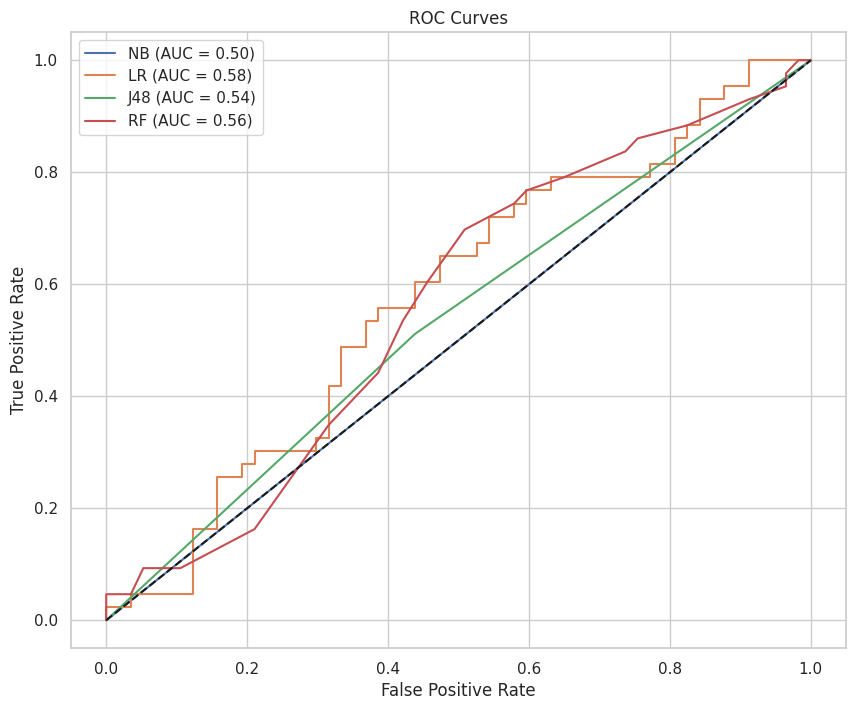

In [131]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='best')
plt.show()


In [132]:
from sklearn.model_selection import cross_val_score

for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='f1_weighted')
    print(f'{model_name} F1 Score (5-fold CV): {scores.mean():.4f}')


NB F1 Score (5-fold CV): 0.3741
LR F1 Score (5-fold CV): 0.5138
J48 F1 Score (5-fold CV): 0.4743
RF F1 Score (5-fold CV): 0.4881


In [133]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Melhor Modelo:", best_model)


Melhor Modelo: RandomForestClassifier(max_depth=20)


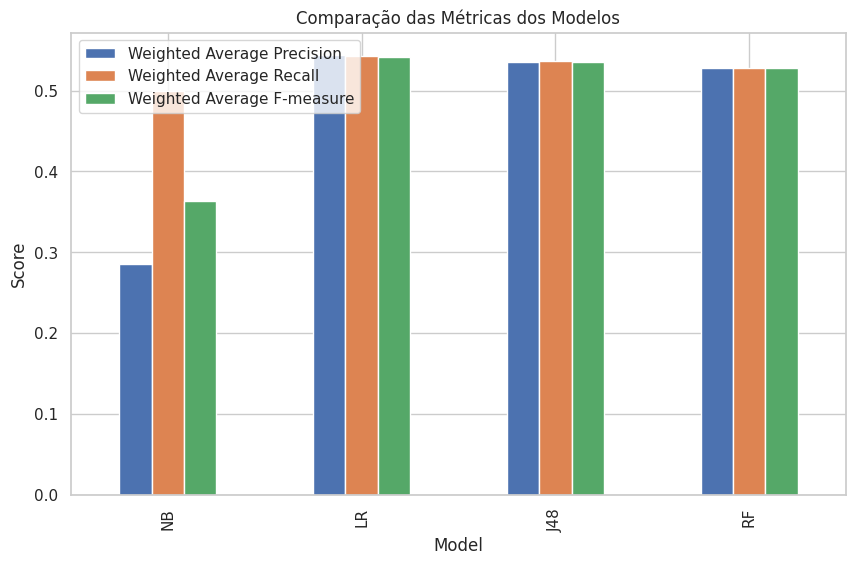

In [134]:
# Exemplo para visualização de desempenho
df_performance.plot(x='Model', y=['Weighted Average Precision', 'Weighted Average Recall', 'Weighted Average F-measure'], kind='bar', figsize=(10, 6))
plt.title('Comparação das Métricas dos Modelos')
plt.ylabel('Score')
plt.show()
